# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [24]:
DATA_FOLDER = './Data/' # Use the data folder provided in Tutorial 02 - Intro to Pandas.
import pandas as pd
import pickle
import numpy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [25]:
import os
root='./Data/ebola'
ls_ebola_folders=os.listdir(root)
def create_df_folder(folder_path):
    '''
    this function scrapes all the csv files in a folder and merges into a single df. 
    '''
    df=pd.DataFrame()
    files_list=os.listdir(folder_path)
    for file_name in files_list:
        df_new=pd.DataFrame()
        try:
            df_new=pd.read_csv(folder_path+'/'+file_name,parse_dates=['Date'])
        except:
            df_new=pd.read_csv(folder_path+'/'+file_name,parse_dates=['date'])
            df_new.rename(columns={'date':'Date'},inplace=True)
        df_new.index=df_new.Date
        df_new.drop('Date')
        df=pd.concat([df,df_new],axis=0)
        
    return df
ebola_dfs_dict={}
for folder in ls_ebola_folders:
    '''
    creates a dictionary ebola_dfs_dict with
    each folder as the key and all the csv files' df as value
    '''
    ebola_dfs_dict[folder]=create_df_folder(root+'/'+folder)

pickle.dump(ebola_dfs_dict,open('ebola_dict.p','wb'))

In [26]:
'''
merged dataframe of all countries is here 
'''
dfs_merged=pd.concat(list(ebola_dfs_dict.values()))
dfs_merged.head()

34 Military Hospital Beyla   Bo  Bo EMC Boffa Bombali  \
Date                                                                
2014-08-04                   NaN   NaN  NaN     NaN     0     NaN   
2014-08-04                   NaN   NaN  NaN     NaN     0     NaN   
2014-08-04                   NaN   NaN  NaN     NaN     0     NaN   
2014-08-04                   NaN   NaN  NaN     NaN     0     NaN   
2014-08-04                   NaN   NaN  NaN     NaN     0     NaN   

            Bomi County  Bong County Bonthe Conakry    ...    Tonkolili  \
Date                                                   ...                
2014-08-04          NaN          NaN    NaN       5    ...          NaN   
2014-08-04          NaN          NaN    NaN       0    ...          NaN   
2014-08-04          NaN          NaN    NaN       1    ...          NaN   
2014-08-04          NaN          NaN    NaN       6    ...          NaN   
2014-08-04          NaN          NaN    NaN       9    ...          NaN   

           Totals Unnamed: 18 Variable Western area Western area combined  \
Date                                                                        
2014-08-04      5         NaN      NaN          NaN                   NaN   
2014-08-04      0         NaN      NaN          NaN                   NaN   
2014-08-04      4         NaN      NaN          NaN                   NaN   
2014-08-04      9         NaN      NaN          NaN                   NaN   
2014-08-04     11         NaN      NaN          NaN                   NaN   

           Western area rural Western area urban  Yomou  variable  
Date                                                               
2014-08-04                NaN                NaN    NaN       NaN  
2014-08-04                NaN                NaN    NaN       NaN  
2014-08-04                NaN                NaN    NaN       NaN  
2014-08-04                NaN                NaN    NaN       NaN  
2014-08-04                NaN                NaN    NaN       NaN  

[5 rows x 67 columns]

In [27]:
ebola_dfs_dict=pickle.load(open('ebola_dict.p','rb'))

In [28]:
#this cell filters guinea dataframe. 
df_guinea=ebola_dfs_dict[ls_ebola_folders[0]]
def filter_new(x):
    ''' 
    this function is used for mapping the conditions for selecting new cases from dataframe.
    boolean return true if a row is to be kept in the frame
    '''
    x=x.lower()
    list_tags=['new','cases','total','registered']
    list_tags2=['new','cases','health','workers']
    if all(item in x for item in list_tags) or all(item in x for item in list_tags2):
        return True
    else:
        return False
criteria=df_guinea.Description.map(filter_new) # apply filter on each row on Description Series 
df_guinea_new=df_guinea[criteria] #filter the new cases
new_cases=df_guinea_new[['Description','Totals']] # select 2 columns, Totals has total number of cases across Guinea
new_cases=new_cases.Totals.astype(float).groupby(new_cases.index).agg(numpy.sum) # multiple new cases for each 
def filter_death(x):
    '''
    this function is used for mapping the conditions for selecting new deaths from dataframe.
    boolean return true if a row is to be kept in the frame. 
    '''
    x=x.lower()
    list_tags=['new','deaths']
    list_not_tags=['confirmed','probables','suspects','today']
    if all(item in x for item in list_tags) and not any(item in x for item in list_not_tags) :
        return True
    else:
        return False
death_criteria=df_guinea.Description.map(filter_death)# apply filter on each row on Description Series
df_guinea_death=df_guinea[death_criteria]#filter the new deaths
deaths=df_guinea_death=df_guinea_death[['Description','Totals']]# select 2 columns, Totals has total number of cases across Guinea
deaths=deaths.Totals.astype(float).groupby(deaths.index).agg(numpy.sum)#sum different cases for new deaths
guinea_new_cases_m=new_cases.resample('M').mean()#daily average of new cases in Guinea per month
guinea_deaths_m=deaths.resample('M').mean()#daily average of new deaths in Guinea per month 
sl_merged=pd.DataFrame(data={'new cases':guinea_new_cases_m,'deaths':guinea_deaths_m})
print('Guinea\'s data:')
print(sl_merged)

Guinea's data:
             deaths  new cases
Date                          
2014-08-31   3.7500    25.8000
2014-09-30   3.5625    20.0625
2014-10-31  15.0000    36.0000


In [29]:
#this cell filters liberia dataframe.
df_liberia=ebola_dfs_dict[ls_ebola_folders[1]]
def filter_new(x):
    ''' 
    this function is used for mapping the conditions for selecting new cases from dataframe.
    boolean return true if a row is to be kept in the frame
    '''
    x=x.lower()
    list_tags=['new','case']
    if all(item in x for item in list_tags):
        return True
    else:
        return False
criteria=df_liberia.Variable.map(filter_new)
df_liberia_new=df_liberia[criteria]
new_cases=df_liberia_new[['Variable','National']]
new_cases=new_cases.National.astype(float).groupby(new_cases.index).agg(numpy.sum)
new_cases.dropna(inplace=True)
def filter_deaths(x):
    '''
    this function is used for mapping the conditions for selecting new deaths from dataframe.
    boolean return true if a row is to be kept in the frame. 
    '''
    x=x.lower()
    list_tags=['newly','deaths']
    if all(item in x for item in list_tags):
        return True
    else:
        return False
criteria=df_liberia.Variable.map(filter_deaths)
df_liberia_death=df_liberia[criteria]
death_cases=df_liberia_death[['Variable','National']]
death_cases=death_cases.National.astype(float).groupby(death_cases.index).agg(numpy.sum)#sum different cases for new deaths
death_cases.dropna(inplace=True)
liberia_new_cases_m=new_cases.resample('M').mean()#daily average of new cases in Liberia per month
liberia_deaths_m=death_cases.resample('M').mean()#daily average of new deaths in Liberia per month
liberia_merged=pd.DataFrame(data={'new cases':liberia_new_cases_m,'deaths':liberia_deaths_m})
print('Liberia\'s data:')
print(liberia_merged)

Liberia's data:
               deaths    new cases
Date                              
2014-06-30   2.142857     6.857143
2014-07-31   4.818182     9.181818
2014-08-31  24.333333    38.111111
2014-09-30  36.666667    65.250000
2014-10-31  28.080000    46.280000
2014-11-30  13.466667    26.800000
2014-12-31   0.000000  5826.000000


In [30]:
#this cell filters S.L. dataframe 
df_sl=ebola_dfs_dict[ls_ebola_folders[2]]
def filter_new(x):
    '''
    this function is used for mapping the conditions for selecting new cases from dataframe.
    boolean return true if a row is to be kept in the frame. 
    '''
    x=x.lower()
    list_tags=['new']
    list_tags_op=['suspected','probable','confirmed']
    if all(item in x for item in list_tags) and (any(item in x for item in list_tags_op)):
        return True
    else:
        return False
criteria=df_sl.variable.map(filter_new)
df_sl_new=df_sl[criteria]
df_sl_new.dropna(axis=1,how='all',inplace=True)
df_sl_new.fillna(value=0,inplace=True)
df_sl_new.drop(['Date','variable'],axis=1,inplace=True)
df_sl_new=df_sl_new.astype(numpy.float32)
df_sl_new=df_sl_new.sum(axis=1)
new_cases=df_sl_new.groupby(df_sl_new.index).agg(numpy.sum)
new_cases.dropna(inplace=True)
def filter_deaths(x):
    '''
    this function is used for mapping the conditions for selecting new deaths from dataframe.
    boolean return true if a row is to be kept in the frame. 
    '''
    x=x.lower()
    list_tags=['new','deaths']
    if all(item in x for item in list_tags):
        return True
    else:
        return False
criteria=df_sl.variable.map(filter_deaths)
df_sl_death=df_sl[criteria]
df_sl_death=df_sl_death.dropna(axis=1,how='all')#some columns have all null, so drop them
df_sl_death=df_sl_death.replace(to_replace='-',value='0')#change - to 0 since it means null
df_sl_death=df_sl_death.fillna(value=0)
df_sl_death=df_sl_death.drop(['Date','variable'],axis=1)#drop non float columns
death_cases=df_sl_death.astype(numpy.float32).sum(axis=1)#sum all columns representing different regions in SL
death_cases=death_cases.groupby(death_cases.index).agg(numpy.sum)#sum different cases for new deaths
sl_new_cases_m=new_cases.resample('M').mean()#daily average of new cases in S.L. per month\n",
sl_deaths_m=death_cases.resample('M').mean()#daily average of new deaths in S.L. per month"
sl_merged=pd.DataFrame(data={'new cases':sl_new_cases_m,'deaths':sl_deaths_m})
print('SL\'s data:')
print(sl_merged)

SL's data:
              deaths   new cases
Date                            
2014-08-31  5.550000   51.799999
2014-09-30  4.620690   83.517242
2014-10-31  5.607143  142.857147
2014-11-30  1.000000  153.809525
2014-12-31  2.200000   82.000000


In [31]:
import holoviews as hv
hv.extension('matplotlib')

:Overlay
   .Curve.Guinea                  :Curve   [Date]   (New cases)
   .Curve.Liberia                 :Curve   [x]   (y)
   .Curve.S_full_stop_L_full_stop :Curve   [x]   (y)
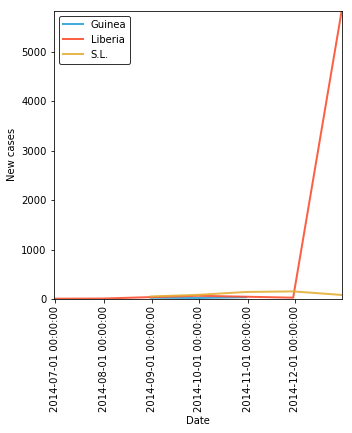

In [32]:
%%opts Overlay [fig_bounds=(0,0,1,1) legend_position='top_left' xrotation=90] Curve (alpha=0.9)
curve_gu=hv.Curve((guinea_new_cases_m.index,guinea_new_cases_m),kdims=['Date'],vdims=['New cases'],label='Guinea')
curve_li=hv.Curve((liberia_new_cases_m.index,liberia_new_cases_m),label='Liberia')
curve_sl=hv.Curve((sl_new_cases_m.index,sl_new_cases_m),label='S.L.')
graph=curve_gu*curve_li*curve_sl
graph

:Overlay
   .Curve.Guinea                  :Curve   [Date]   (Deaths)
   .Curve.Liberia                 :Curve   [x]   (y)
   .Curve.S_full_stop_L_full_stop :Curve   [x]   (y)
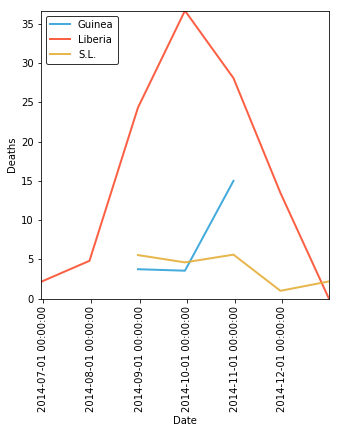

In [33]:
%%opts Overlay [fig_bounds=(0,0,3,1) legend_position='top_left' xrotation=90] Curve (alpha=0.9 )
curve_gu=hv.Curve((guinea_deaths_m.index,guinea_deaths_m),kdims=['Date'],vdims=['Deaths'],label='Guinea')
curve_li=hv.Curve((liberia_deaths_m.index,liberia_deaths_m),label='Liberia')
curve_sl=hv.Curve((sl_deaths_m.index,sl_deaths_m),label='S.L.')
curve_gu*curve_li*curve_sl

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [34]:
# Write your answer here

# import the 9 spreadsheets into a dataFrame, and store the legth of each for subsequent use
lenghts = []
df_2 = pd.DataFrame()
data_folder = './Data/microbiome/'
files_list = os.listdir(data_folder)
for file_name in files_list[1:]:
    df_new=pd.read_excel(data_folder+'/'+file_name, header = None)
    df_2=pd.concat([df_2,df_new],axis=0, ignore_index = True)
    lenghts.append(len(df_new))

df_2.columns= ['Bacteria', 'Occur']
df_2.tail()

Bacteria  Occur
2391  Bacteria "Thermotogae" Thermotogae Thermotogal...     43
2392  Bacteria "Thermotogae" Thermotogae Thermotogal...     16
2393  Bacteria "Verrucomicrobia" Opitutae Opitutales...      1
2394  Bacteria Cyanobacteria Cyanobacteria  Chloropl...      1
2395  Bacteria Cyanobacteria Cyanobacteria  Chloropl...     10

In [35]:
# read the metadata and insert the sample, the group and also the Barcode. 
# The barcode is necessary because bacteria across the 9 spreadsheets is not unique (but is testes in different conditions)
metadata = pd.read_excel(data_folder+'/'+'metadata.xls')
metadata.head
#Add columns group, sample, barcode
metadata.loc[1].BARCODE
metadata.loc[1]
group_col = pd.DataFrame()
sample_col = pd.DataFrame()
barcode_col = pd.DataFrame()
for i in range (9):
    group_col = pd.concat([group_col, pd.Series([metadata.loc[i].GROUP] * lenghts[i])],ignore_index=True,verify_integrity = True)
    sample_col = pd.concat([sample_col, pd.Series([metadata.loc[i].SAMPLE] * lenghts[i])], ignore_index=True, verify_integrity= True)
    barcode_col = pd.concat([barcode_col, pd.Series([metadata.loc[i].BARCODE] * lenghts[i])], ignore_index=True, verify_integrity= True)
# add the columns to the data
df_2['Group'] = group_col
df_2['Sample'] = sample_col
df_2['Barcode'] = barcode_col

In [36]:
# Hierarchical indexing based on barcode and then bacteria, since the bacteria is unique by file
df_idx = df_2.set_index([ 'Barcode', 'Bacteria'])
df_idx.index.is_unique

True

In [37]:
df_idx = df_idx.fillna('unknown')
df_idx.tail(200)

Occur      Group  \
Barcode Bacteria                                                               
MID9    Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      1  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...     91  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      1  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      3  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      1  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      2  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      1  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      1  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      8  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...     18  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      7  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      2  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...     14  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...      1  Control 2   
        Bacteria "Firmicutes" "Bacilli" "Lactobacillale...     16  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales "Pae...      2  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales "Pae...      6  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales "Spo...      7  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales "Sta...    735  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales "Sta...  11277  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...     22  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...     21  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...     28  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...      3  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...    622  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...    246  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...     93  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...     15  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...    109  Control 2   
        Bacteria "Firmicutes" "Bacilli" Bacillales Baci...    149  Control 2   
...                                                           ...        ...   
        Bacteria "Proteobacteria" Gammaproteobacteria O...     10  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria O...      1  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria O...      1  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria P...      1  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria P...     12  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria P...      4  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria P...    805  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria P...    862  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria P...     12  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria P...   3534  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      4  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      1  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria T...     25  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria T...      2  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      3  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      2  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...      1  Control 2   
        Bacteria "Proteobacteria" Gammaproteobacteria X...  

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [38]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [39]:
# Read the data
titanic = pd.read_excel('Data/titanic.xls', sheetname='titanic')

 1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical.

As a first step, to clean up the data we first convert all the ticket data, which was a mix of strings and ints, to strings. In this case, we do not remove nans or fill them with other values. Afterwards, to obtain the data type we use the method dtypes, where int64 and float64 indicates a number and object a string.

For obtaining the value range we distinguish two cases depending on whether an atribute can be categorized. If it cannot be categorized, we just specify the minimum and maximum values. If it can be categorized, we specify the list of values it can have. We consider that an attribute can be categorized if it takes a discrete number of values. Thus, for example as there are only three classes, we can categorize pclass, but cannot categorize name as everyone had their own value. Following this criteria the attributes tha can be Categorical are: pclass, survived, sex, sibps, parch, fare, embarked, boat, home.dest.


In [40]:
#Cleaning
titanic.ticket=titanic.ticket.astype(str)

#Data types
data_types=titanic.dtypes
print('Data types:\n', data_types)

#Value range
can_categ=['pclass', 'survived', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'boat', 'home.dest']
not_categ=['name','age','ticket','cabin','body']

#Value range of non-categorical data: minimum and maximum
value_range_not_cat=pd.DataFrame([titanic[not_categ].min(),titanic[not_categ].max()],index=['Minimum', 'Maximum'])
print('\n\nValue range of non-categorical data: \n', value_range_not_cat)
#Value range of categorical datas: categories
value_range_cat=pd.DataFrame([[titanic[x].unique()] for x in can_categ],index=can_categ, columns=['Categories']).transpose
print('\nValue range of categorical data: \n', value_range_cat)


#Categorical data
categorized_data=[pd.Categorical(x).categories for x in can_categ]


Data types:
 pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


Value range of non-categorical data: 
                                 name      age     ticket   body
Minimum          Abbing, Mr. Anthony   0.1667     110152    1.0
Maximum  van Melkebeke, Mr. Philemon  80.0000  WE/P 5735  328.0

Value range of categorical data: 
 <bound method DataFrame.transpose of                                                   Categories
pclass                                             [1, 2, 3]
survived                                              [1, 0]
sex                                           [female, male]
sibsp                                  [0, 1, 2, 3, 4, 5, 8]
parch                               [0, 2, 1, 4, 3, 5, 6, 9]
fare   

 2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

For the travel class histogram, we can specify the number of bins with the number of unique values in this atribute. On the other hand, to obtain the histogram for the embarkation port and the sex, as they are objects and we cannot call directly the hist method there are two options: 1) Replace the possible values (e.g S, C, Q) with numbers and then call hist; or 2) use value_counts() to get the frequency of each of the possible values and then plot it with a bar plot. We use the later option, ignoring all passengers that do not have data for those atributes.
For the age histogram, we ignore the passengers who do not have an age and who have less than one year, because they are likely to come from mistakes when entering the information. However, we do not ignore the cases with 0.5 in their ages, because they are all in the same decade whether they have 0.5 or not. To compute the histogram, we first compute the bin edges, rounding to the nearest decade the smallest and biggest number in the atribute and using a step size of 10. Then we group the data into bins with cut and use value_counts() to count how many cases are in each of the ranges. Last, we use a bar plot to show the histogram.

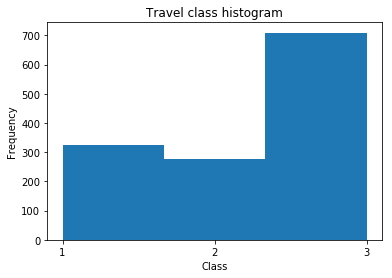

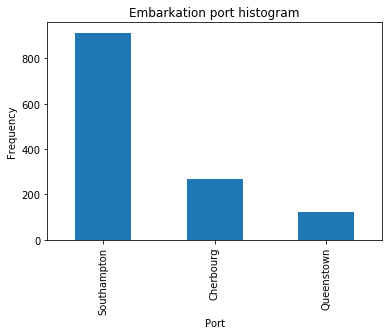

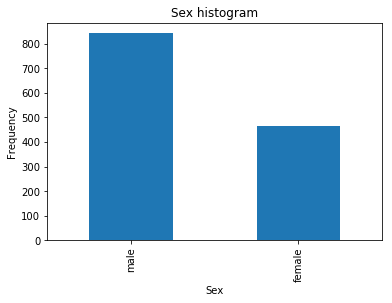

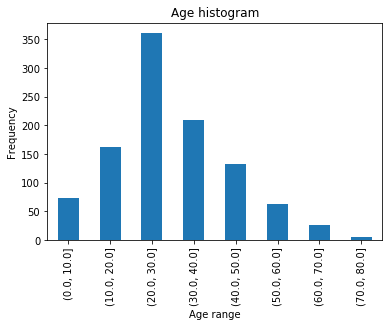

In [41]:
#pclass

titanic.pclass.hist(bins=len(titanic.pclass.unique()), grid=False)
plt.title('Travel class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(titanic.pclass.unique())

#Embarkation port
plt.figure()
titanic.embarked.value_counts(sort=False).plot(kind='bar')
plt.title('Embarkation port histogram')
plt.xlabel('Port')
plt.ylabel('Frequency')

plt.xticks([0,1,2], ['Southampton', 'Cherbourg', 'Queenstown']) 


#Sex
plt.figure()
titanic.sex.value_counts().plot(kind='bar')
plt.title('Sex histogram')
plt.xlabel('Sex')
plt.ylabel('Frequency')

#Age
plt.figure()


age_clean=titanic.age[titanic.age>=1.0]
age_bins=np.arange(np.floor(age_clean.min()/10)*10,np.ceil(age_clean.max()/10)*10+10,10)
pd.cut(age_clean, age_bins,right=True).value_counts(sort=False).plot(kind='bar')

plt.title('Age histogram')
plt.xlabel('Age range')
plt.ylabel('Frequency')


   3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

To get the deck where each passengers cabin was situated we just use the first letter of the cabin code. This is motivated by the fact that several passengers do not have a cabin number, just the letter and because in some cases several letters are indicated, probably due to errors in the database. Additionally, remove a case with deck 'T', as decks were numbered from 'A' to 'G' and we fill the missing data with 'U' (Unknown).


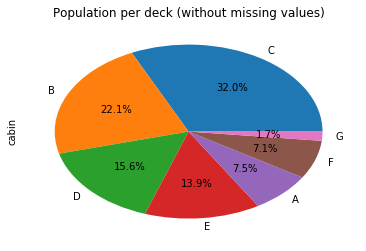

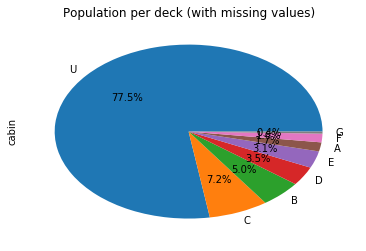

In [42]:
decks=titanic.cabin.fillna('U').apply(lambda x: x[0])
decks[decks=='T']='U'
decks_not_U=decks[decks!='U']

decks_not_U.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Population per deck (without missing values)')

plt.figure()
decks.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Population per deck (with missing values)')


    4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

In this case, we directly count how many survivors and deceased are in each of the travel classes

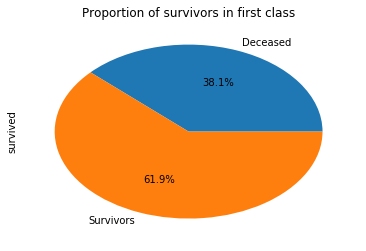

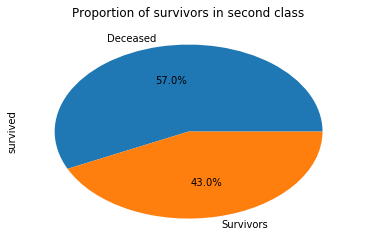

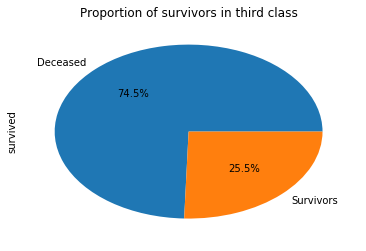

In [43]:
titanic[titanic.pclass==1].survived.value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%',labels=['Deceased','Survivors'])
plt.title('Proportion of survivors in first class')

plt.figure()
titanic[titanic.pclass==2].survived.value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%',labels=['Deceased','Survivors'])
plt.title('Proportion of survivors in second class')

plt.figure()
titanic[titanic.pclass==3].survived.value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%',labels=['Deceased','Survivors'])
plt.title('Proportion of survivors in third class')

    5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.
Instead of showing the proportion of survivors and the proportion of deceased, we show the proportion of survivors of the total. To do show, first we select the survivors and then group then by class and sex, counting the number of occurences and dividing them by the total of each class.

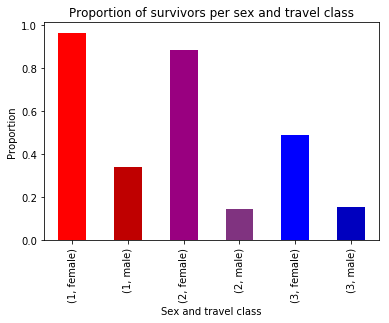

In [44]:

survivors=titanic[titanic.survived==1].groupby(titanic.pclass).sex.value_counts(sort=False)/(titanic.groupby(titanic.pclass).sex.value_counts(sort=False))
survivors.plot(kind='bar', color=[[1,0,0],[0.75,0,0],[0.6,0.0,0.5],[0.5,0.2,0.5],[0,0,1],[0,0,0.750]])
plt.title('Proportion of survivors per sex and travel class')
plt.xlabel('Sex and travel class')
plt.ylabel('Proportion')

    6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

In the first place, we fill up the passengers without values with 0 and clean up the data, rounding to the smallest integer the ages. Thus, all values which were smaller than 1 are 0 now, the same result as if the field was empty. To get the equally populated categories there are two choices: 1) use the median, because is the point which indicates that half the passengers have more or less than that age; or 2) use qcut dividing the data in two segments, which we will use.
To compute the proportion we group the data by the age categories, the passenger class and the sex. We divide the number of survivors and dead by the total number of passengers in each of the groups

In [45]:
titanic2=titanic.copy() #To make changes to the data
#Clean up the data
titanic2.age=np.floor(titanic.age.fillna(0))
#Create a new atribute with the class that divides in two categories
titanic2['age_class']=pd.qcut(titanic2.age,2,labels=['younger', 'older'])
#Total number of passengers in each of the categories grouped by class and sex
total_grouped=titanic2.groupby(['age_class','pclass']).sex.value_counts(sort=False)
total_repeated=np.repeat([total_grouped[x] for x in range(0,len(total_grouped))],2) #Repeat each element twice to divide the survivors and dead 
#Survival proportion in each of the categories grouped by class and sex: survivors or not in each divided by the total number of passengers in each
survival_proportion=titanic2.groupby(['age_class','pclass','sex']).survived.value_counts(sort=False)/total_repeated
survival_proportion


age_class  pclass  sex     survived
older      1       female  0           0.040404
                           1           0.959596
                   male    0           0.666667
                           1           0.333333
           2       female  0           0.135593
                           1           0.864407
                   male    0           0.925926
                           1           0.074074
           3       female  0           0.620690
                           1           0.379310
                   male    0           0.834254
                           1           0.165746
younger    1       female  0           0.022222
                           1           0.977778
                   male    0           0.638298
                           1           0.361702
           2       female  0           0.085106
                           1           0.914894
                   male    0           0.730159
                           1           0.269841
    